In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
employee_df = pd.read_excel('../data/HR_Employee_Data1.xlsx')
employee_df.head()

,Unnamed: 0,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
employee_df.columns

Index(['Unnamed: 0', 'emp_id', 'satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'work_accident', 'left', 'promotion_last_5years', 'department',
       'salary'],
      dtype='object')

In [4]:
employee_df = employee_df.drop(['Unnamed: 0'], axis=1)

In [5]:
employee_df_num = employee_df._get_numeric_data()
employee_df_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


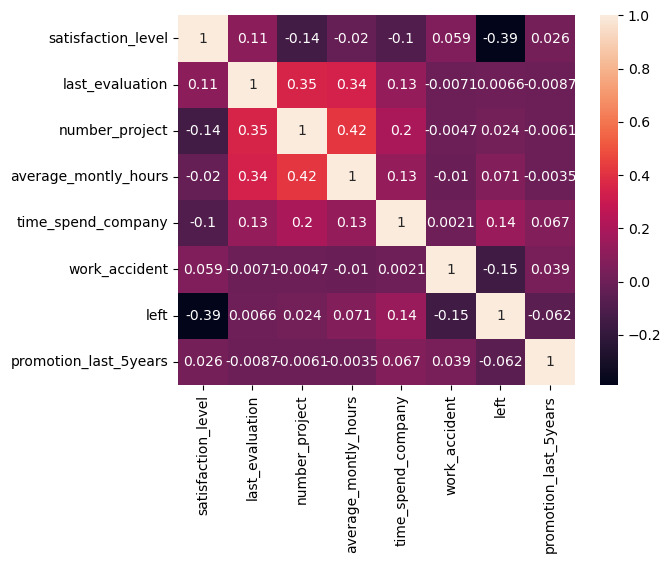

In [6]:
correlations_matrix = employee_df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

As we could expect, there are some correlations for exemple between number_project to average_monthly_hours, the correliation between the left column and satisfaction_level is a bit lower than expected but still high in comparison to most of them.

In [7]:
employee_df['department'].value_counts(dropna=False)

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

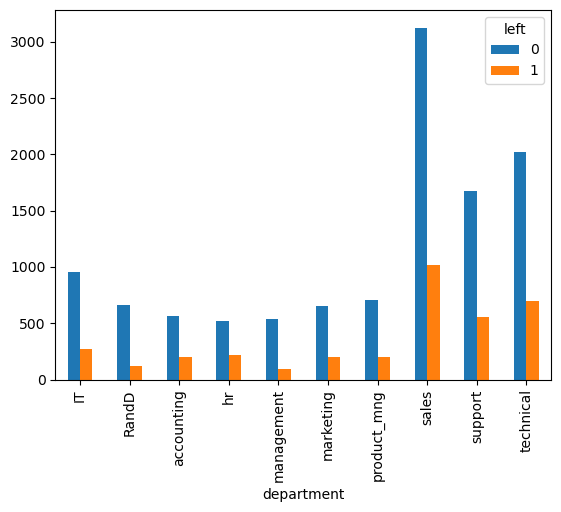

In [8]:
pd.crosstab(employee_df.department,employee_df.left).plot(kind='bar')
plt.savefig("../images/departmentXleft.png", dpi=300)
plt.show()

The management comparison to the left column, is the one with the lowest ratio of employees leaving, as expected.

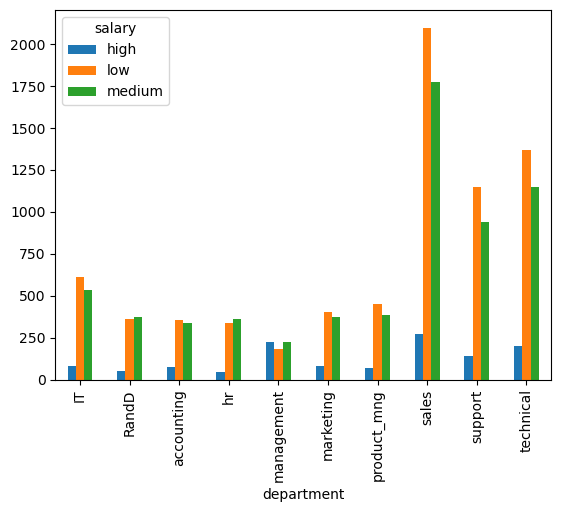

In [9]:
pd.crosstab(employee_df.department,employee_df.salary).plot(kind='bar')
plt.savefig("../images/departmentXsalary.png", dpi=300)
plt.show()

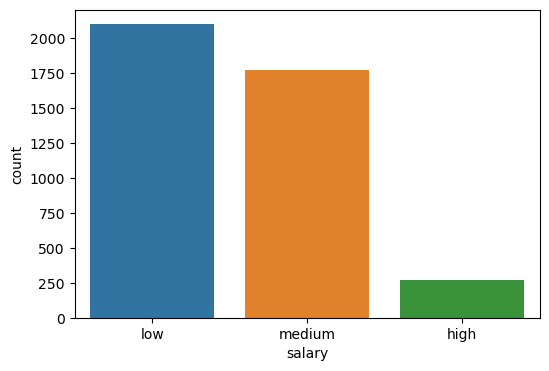

In [10]:
sales = employee_df[employee_df["department"] == "sales"]
fig,ax = plt.subplots(figsize=(6,4))
sns.countplot(data=sales, x="salary", ax=ax)
plt.savefig("../images/departmentXsalary(sales).png", dpi=300)
plt.show()

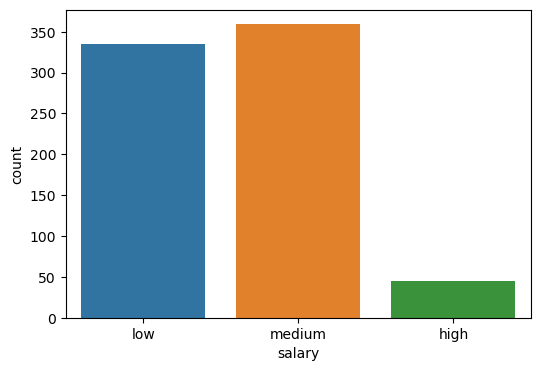

In [11]:
hr = employee_df[employee_df["department"] == "hr"]
fig,ax = plt.subplots(figsize=(6,4))
sns.countplot(data=hr, x="salary", ax=ax)
plt.savefig("../images/departmentXsalary(hr).png", dpi=300)
plt.show()

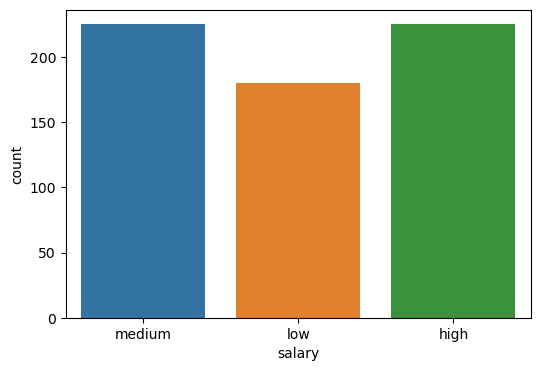

In [12]:
management = employee_df[employee_df["department"] == "management"]
fig,ax = plt.subplots(figsize=(6,4))
sns.countplot(data=management, x="salary", ax=ax)
plt.savefig("../images/departmentXsalary(management).png", dpi=300)
plt.show()

In [13]:
employee_df['salary'].value_counts(dropna=False)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

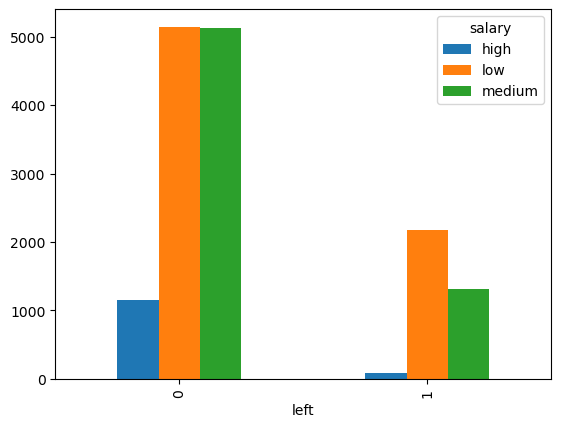

In [14]:
pd.crosstab(employee_df.left,employee_df.salary).plot(kind='bar')
plt.savefig("../images/leftXsalary(sales).png", dpi=300)
plt.show()

Also as expected the employees with lowest salary are the ones leaving more often.

<AxesSubplot:xlabel='work_accident'>

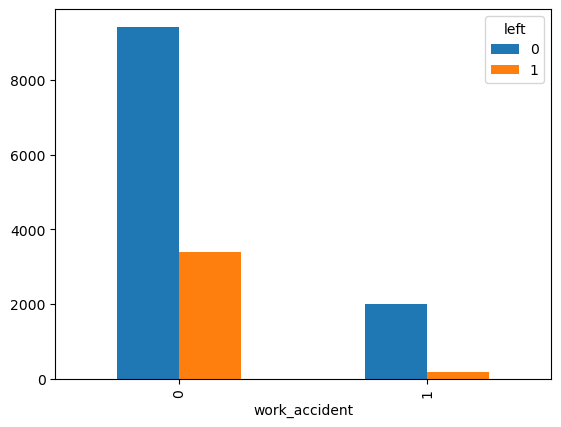

In [15]:
pd.crosstab(employee_df.work_accident,employee_df.left).plot(kind='bar')

Not much to be said about this plot.

In [16]:
employee_df['promotion_last_5years'].value_counts(dropna=False)

0    14680
1      319
Name: promotion_last_5years, dtype: int64

<AxesSubplot:xlabel='promotion_last_5years'>

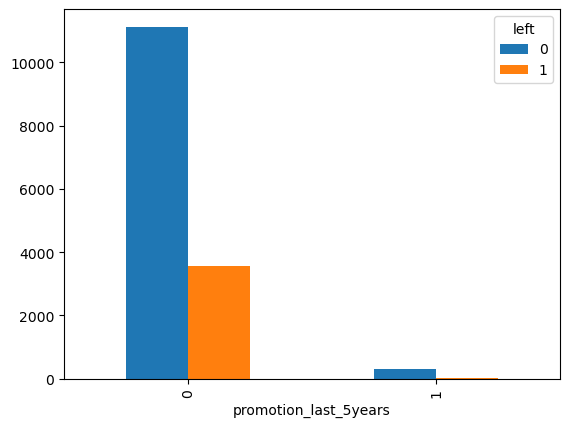

In [17]:
pd.crosstab(employee_df.promotion_last_5years,employee_df.left).plot(kind='bar')

Since the amount of employees that got promoted in between the last five is so little that there is also nothing not be said about it.

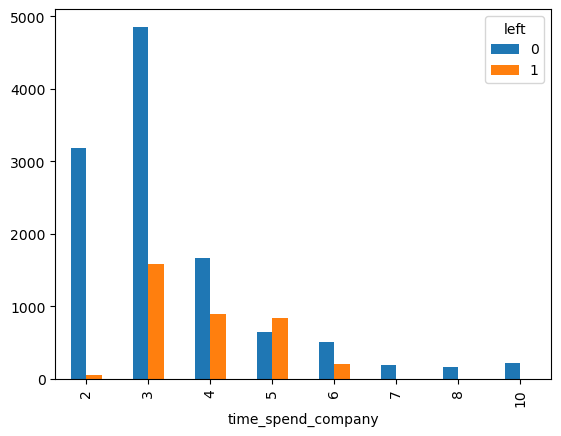

In [18]:
pd.crosstab(employee_df.time_spend_company,employee_df.left).plot(kind='bar')
plt.savefig("../images/companytimeXleft.png", dpi=300)
plt.show()

The ratio of people leaving during their 3rd year with the company is as expected, the 5th year ratio is unexpected.

Describing the columns average_montly_hours and satisfaction_level, in order to create apropriate bins to plot them on a more accurate way.

In [19]:
employee_df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [20]:
employee_df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

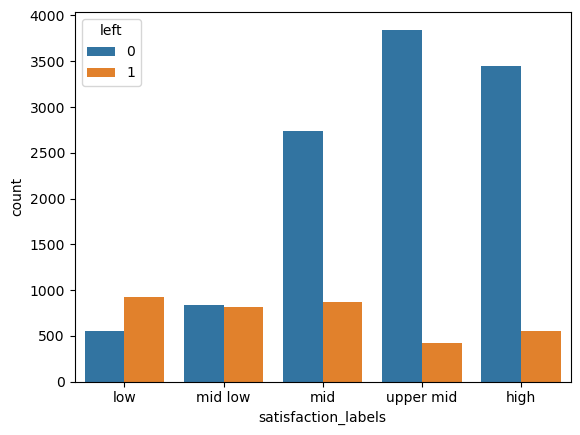

In [21]:
bin_edg=[0,0.2,0.4,0.6,0.8,1]
bin_lbl=['low', 'mid low', 'mid', 'upper mid', 'high']
employee_df['satisfaction_labels']=pd.cut(employee_df['satisfaction_level'], bins = bin_edg, labels = bin_lbl)
sns.countplot(x=employee_df['satisfaction_labels'], hue=employee_df["left"])
plt.savefig("../images/satisfactionXleft.png", dpi=300)
plt.show()

In [22]:
employee_df['satisfaction_labels'].value_counts()

upper mid    4268
high         4002
mid          3605
mid low      1646
low          1478
Name: satisfaction_labels, dtype: int64

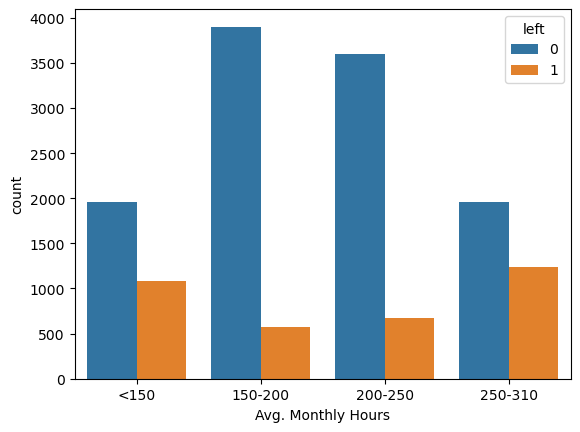

In [23]:
bin_edgamh=[96,150,200,250,310]
bin_lblamh=['<150', '150-200', '200-250', '250-310']
employee_df['average_montly_hours_lbl']=pd.cut(employee_df['average_montly_hours'], bins = bin_edgamh,
                                               labels = bin_lblamh)
sns.countplot(x=employee_df['average_montly_hours_lbl'], hue=employee_df["left"]).set(
     xlabel="Avg. Monthly Hours")
plt.savefig("../images/avgworkinghoursXleft.png", dpi=300)
plt.show()

In [24]:
employee_df['average_montly_hours_lbl'].value_counts()

150-200    4471
200-250    4273
250-310    3202
<150       3047
Name: average_montly_hours_lbl, dtype: int64

As expected the amount of employees that left the company that work on average more than 250 hours per month is significantly higher. 

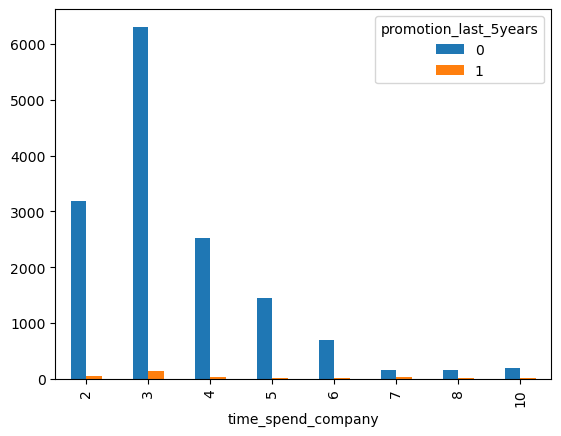

In [25]:
pd.crosstab(employee_df.time_spend_company,employee_df.promotion_last_5years).plot(kind='bar')
plt.savefig("../images/companytimenXpromotion.png", dpi=300)
plt.show()